In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
import pandas as pd

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_10_signs.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
# data_set = pd.read_csv(dataset)
# data_set.info()

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8047 - loss: 0.5322
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier_10_signs.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7864 - loss: 0.5836 - val_accuracy: 0.9002 - val_loss: 0.2437
Epoch 2/1000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8281 - loss: 0.5072
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier_10_signs.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8061 - loss: 0.5464 - val_accuracy: 0.9204 - val_loss: 0.2267
Epoch 3/1000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7656 - loss: 0.5811
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier_10_signs.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7867 - loss: 0.5578 - val_accuracy: 0.8979 - val_loss: 0.2419
Epoch 4/1000
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7891 - loss: 0.5623
Epoch 4: saving model to model/keypoint_classifie

In [21]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.2269


In [22]:
history.history["accuracy"]

[0.779405951499939,
 0.7992079257965088,
 0.7869306802749634,
 0.7790098786354065,
 0.785346508026123,
 0.7671287059783936,
 0.7885148525238037,
 0.8043564558029175,
 0.7750495076179504,
 0.7762376070022583,
 0.7920792102813721,
 0.7865346670150757,
 0.790099024772644,
 0.7849504947662354,
 0.7893069386482239,
 0.7841584086418152,
 0.7857425808906555,
 0.7782177925109863,
 0.7920792102813721,
 0.7960395812988281,
 0.7671287059783936,
 0.7786138653755188,
 0.7801980376243591,
 0.7956435680389404,
 0.7912871241569519,
 0.7980198264122009,
 0.7659406065940857,
 0.7801980376243591,
 0.7849504947662354,
 0.7841584086418152,
 0.7936633825302124,
 0.7936633825302124,
 0.7857425808906555,
 0.7877227663993835,
 0.7940593957901001,
 0.8063366413116455,
 0.7790098786354065,
 0.790099024772644,
 0.7960395812988281]

In [23]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [24]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)),y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[3.4637630e-02 1.1273278e-05 2.9341480e-02 9.2777246e-01 1.4290292e-09
 2.9864449e-03 2.3668587e-09 4.0829326e-03 1.7991461e-04 9.8782894e-04]
3 3


# Confusion matrix

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        73
           1       1.00      0.61      0.76       143
           2       1.00      0.63      0.78        41
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        65
           7       0.98      1.00      0.99       160
           8       0.66      1.00      0.80       111
           9       1.00      0.97      0.98        89

    accuracy                           0.91       842
   macro avg       0.95      0.92      0.92       842
weighted avg       0.94      0.91      0.91       842



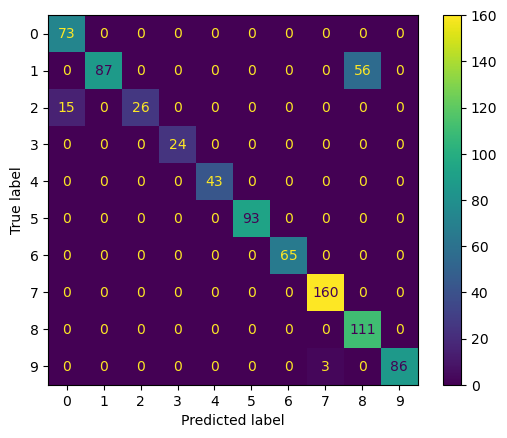

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cmx_data, display_labels = labels)
    cm_display.plot()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [30]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [31]:
# Transform model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\nasan\AppData\Local\Temp\tmpuhjmznmi\assets


INFO:tensorflow:Assets written to: C:\Users\nasan\AppData\Local\Temp\tmpuhjmznmi\assets


Saved artifact at 'C:\Users\nasan\AppData\Local\Temp\tmpuhjmznmi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2247251413328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247251415248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247251412560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247251414096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247251415440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2247251412368: TensorSpec(shape=(), dtype=tf.resource, name=None)


6800

# Inference test

In [32]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [33]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [34]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [35]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.03 ms


In [36]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4637641e-02 1.1273279e-05 2.9341470e-02 9.2777258e-01 1.4290319e-09
 2.9864409e-03 2.3668585e-09 4.0829284e-03 1.7991480e-04 9.8782859e-04]
3
